**Imports**

In [2]:
"""
IMPORTS
"""
import numpy as np 
import matplotlib.pyplot as plt
import random
import math
import statistics
from scipy import stats
import astropy.io.fits as fits
from photutils.centroids import centroid_1dg, centroid_2dg, centroid_quadratic, centroid_com
import scipy.constants as constant
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

**2.1 Wavelength solution of 1-dimisional Neon spectrum and blackbody temperature**

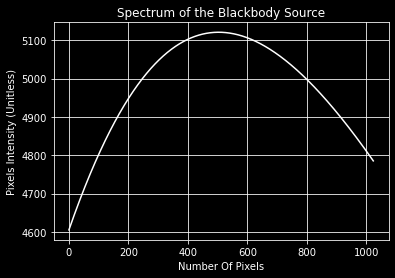

Figure 1. Spectrum of the blackbody source obtained with the spectrograph in 'Group_F_BB.dat'.


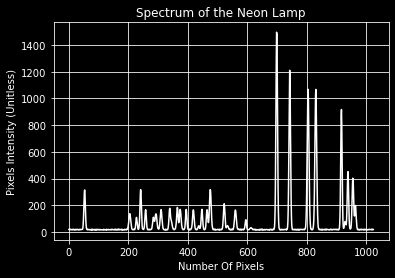

Figure 2. Spectrum of a Neon lamp in 'Ne_calib.dat'.


In [4]:
with open('Group_F_BB.dat') as f:
    lines = f.readlines()
    for line in lines:
        line.rstrip()
    BB_spectrum = list(str(line.rstrip().replace("\n", "")) for line in lines)
    BB_spectrum = list(str(line.rstrip().replace(" ", "")) for line in lines)

#Converting string to float for y(Intensity) values
y = [float(i) for i in BB_spectrum]
#Turning lists into arrays for calculation purposes
BB_y = np.array(y)

plt.plot(BB_y, '-', color='white')
plt.style.use('dark_background')
plt.grid()

#adding labels
plt.xlabel('Number Of Pixels') 
plt.ylabel('Pixels Intensity (Unitless)')
plt.title('Spectrum of the Blackbody Source')
caption="Figure 1. Spectrum of the blackbody source obtained with the spectrograph in 'Group_F_BB.dat'."

#plt.savefig('Lab2_fig1.png' + '.png', bbox_inches='tight', dpi=400)
plt.show()
print(caption)
#----------------------------------------------------------------------------------
with open('Ne_calib.dat') as f:
    lines = f.readlines()
    for line in lines:
        line.rstrip()
    NeonLamp_spectrum = list(str(line.rstrip().replace("\n", "")) for line in lines)
    NeonLamp_spectrum = list(str(line.rstrip().replace(" ", "")) for line in lines)

#Converting string to float for y(Intensity) values
y = [float(i) for i in NeonLamp_spectrum]
#Turning lists into arrays for calculation purposes
neon_y = np.array(y)

plt.plot(neon_y, '-', color='white')
plt.style.use('dark_background')
plt.grid()

#adding labels
plt.xlabel('Number Of Pixels') 
plt.ylabel('Pixels Intensity (Unitless)')
plt.title('Spectrum of the Neon Lamp')
caption="Figure 2. Spectrum of a Neon lamp in 'Ne_calib.dat'."

#plt.savefig('Lab2_fig2.png' + '.png', bbox_inches='tight', dpi=400)
plt.show()
print(caption)

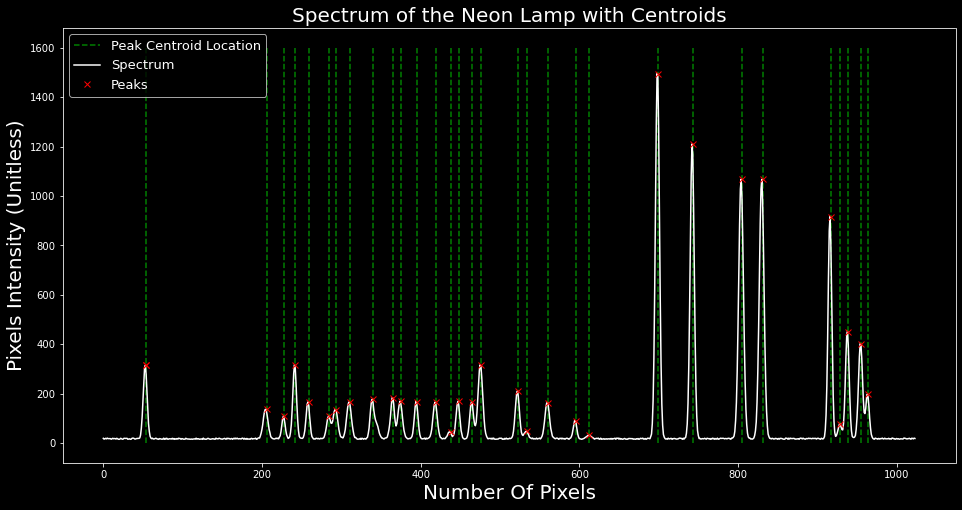

Figure 5. Spectrum of a Neon lamp in 'Ne_calib.dat' with the peaks and their centroids.


In [5]:
wavelengths = [540.056, 576.441, 582.015, 585.249, 588.189, 594.483, 597.553, 602.000, 607.433, 614.306, 616.359, 621.728, 626.649, 630.479, 633.442, 638.229, 
               640.225, 650.653, 653.288, 659.895, 667.828, 671.704, 692.947, 703.241, 717.394, 724.512, 743.890, 747.244, 748.887, 753.577, 754.404]
#the wavelengths were identified by comparing the figures
wavelengths = np.array(wavelengths)

#Finding the peaks
threshhold =  31.12473 #threshold to find peaks higer the set limit
peaks = []     #peaks for the y values
for i in range(len(neon_y)-2): #len(signal)-1 because you will be checking the value after than your last i 
    if neon_y[i] > neon_y[i-1] and neon_y[i] > neon_y[i+1] and neon_y[i]>neon_y[i-2] and neon_y[i]>neon_y[i+2] and neon_y[i] > threshhold :  #conditions to be a peak
            peaks.append(neon_y[i])

centroids = [] #Values for all the centroids
for i in peaks:
    x = np.where(neon_y == i)[0][0]+1
    centroids.append(x)

plt.figure(figsize=[16, 8])
plt.vlines(centroids, 0, 1600, color='green', ls='--')
plt.axvline(centroids[0], 5, 1600, color='green',ls='--',label='Peak Centroid Location')

plt.plot(neon_y, '-', color='white', label='Spectrum')
plt.style.use('dark_background')

for i in range(len(peaks)): 
    plt.plot(centroids[i], peaks[i], 'kx', color='red')
plt.plot(centroids[0], peaks[0], 'kx', color='red', label='Peaks')

#adding labels
plt.legend(loc=2, fontsize=13)
plt.xlabel('Number Of Pixels', size=20) 
plt.ylabel('Pixels Intensity (Unitless)', size=20)
plt.title('Spectrum of the Neon Lamp with Centroids', size=20)
caption="Figure 5. Spectrum of a Neon lamp in 'Ne_calib.dat' with the peaks and their centroids."

#plt.savefig('Lab2_fig5.png' + '.png', bbox_inches='tight', dpi=400)
plt.show()
print(caption)

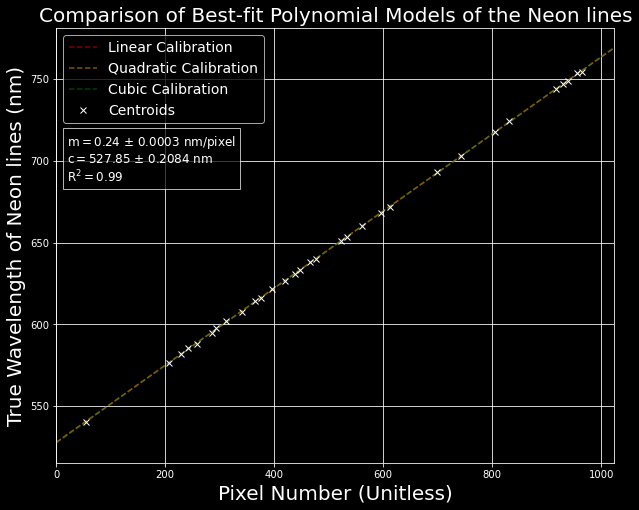

Figure 6. Graph establishing relationship between wavelength and pixel-position for measurements made in the Neon lmap spectral regions. The true values are m = 0.23576608331289753 and c = 527.8464221854151.


In [6]:
#Obtain best fit models with polyfit
polyfit_lin = np.polyfit(centroids, wavelengths, 1)
polyfit_quad = np.polyfit(centroids, wavelengths, 2)
polyfit_cube = np.polyfit(centroids, wavelengths, 3)

pixel_number = np.arange(1024)
#Now compute our best-fit models for all pixel values
lin_cal_polyfit =  polyfit_lin[0]*pixel_number + polyfit_lin[1]
quad_cal_polyfit =  polyfit_quad[0]*(pixel_number**2) + polyfit_quad[1]*pixel_number + polyfit_quad[2]
cube_cal_polyfit =  (polyfit_cube[0]*np.power(pixel_number,3) + 
                     polyfit_cube[1]*np.power(pixel_number,2) + 
                     polyfit_cube[2]*pixel_number + polyfit_cube[3])

#Plot all of the best-fit models
plt.figure(figsize = (10,8))
#Original OLS calibration
# plt.plot(pixel_number, lin_cal, '--', color = 'red',
#          alpha = 0.5, label = 'Linear Calibration')
# plt.plot(pixel_number, quad_cal, '--', color = 'orange',
#          alpha = 0.5, label = 'Quadratic Calibration')
# plt.plot(pixel_number, cube_cal, '--', color = 'green', 
#          alpha = 0.5, label = 'Cubic Calibration')
###with polyfit
plt.plot(pixel_number, lin_cal_polyfit, '--', color = 'red',
         alpha = 0.5, label = 'Linear Calibration')
plt.plot(pixel_number, quad_cal_polyfit, '--', color = 'orange',
         alpha = 0.5, label = 'Quadratic Calibration')
plt.plot(pixel_number, cube_cal_polyfit, '--', color = 'green', 
         alpha = 0.5, label = 'Cubic Calibration')

slope_intercept = np.polyfit(centroids,wavelengths,1)
m=slope_intercept[0]
c=slope_intercept[1]

#Calculating the r^2 value for linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(centroids, wavelengths)

text = '\n'.join((
    r'$\mathrm{m}=%.2f$' % (m, ) + ' ± 0.0003 nm/pixel',
    r'$\mathrm{c}=%.2f$' % (c, ) + ' ± 0.2084 nm',
    r'$\mathrm{R^2}=%.2f$' % (0.99, )))
plt.text(20,687, text, fontdict=dict(fontsize=12), bbox=dict(facecolor='black', alpha=0.7, edgecolor='white'))


plt.plot(centroids, wavelengths, 'x', color = 'white', label='Centroids')
plt.grid()
plt.xlabel("Pixel Number (Unitless)", size = 20)
plt.ylabel("True Wavelength of Neon lines (nm)", size = 20)
plt.title("Comparison of Best-fit Polynomial Models of the Neon lines", size = 20)
#plt.legend(loc="best")
plt.legend(prop={'size': 14})
plt.xlim(0, 1024)

#plt.savefig('Lab2_fig6.png' + '.png', bbox_inches='tight', dpi=400)
plt.show()

caption="Figure 6. Graph establishing relationship between wavelength and pixel-position for measurements \
made in the Neon lmap spectral regions. The true values are m = "+str(m)+" and c = "+str(c)+"."
print(caption)

#Error uncertainties
#p, V  = np.polyfit(centroids, wavelengths, 1, cov=True)
#print("x_1: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
#print("x_2: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

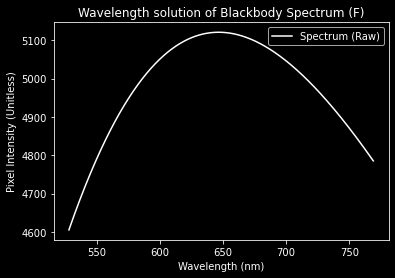

Figure 7. Graph establishing relationship between wavelength and pixel intensity for blackbody spectrum


In [7]:
BB_wavelengths = [m*i+c for i in range(len(BB_spectrum))]
BB_wavelengths = np.array(BB_wavelengths)

plt.plot(BB_wavelengths, BB_y, color='white', label='Spectrum (Raw)')

plt.legend(loc="best")
plt.xlabel('Wavelength (nm)') 
plt.ylabel('Pixel Intensity (Unitless)')
plt.title('Wavelength solution of Blackbody Spectrum (F)')

caption="Figure 7. Graph establishing relationship between wavelength and pixel intensity for blackbody spectrum"

#plt.savefig('Lab2_fig7.png' + '.png', bbox_inches='tight', dpi=400)
plt.show()
print(caption)

We can use Weins law to calculate the Blackbody temperature using the value where the peak wavelength happens:
$$
  \lambda_{max} = \frac{2.898\times10^3 mK}{T}
$$
Converting this to solve for T (K):
$$
  T = \frac{2.898\times10^3 mK}{\lambda_{max}}
$$

In [8]:
max_wavelength = BB_wavelengths[np.argmax(BB_y)]
print(max_wavelength)
max_wavelength = 6.464367620918026124*10**(-7) #Converting max lambda unit from nm to m

temp = (2.898*10**(-3))/max_wavelength #Equation used from lecture material
temp_std = 1.76929551650037
print("BB temp: ", temp, "±", temp_std, "K")

646.4367620918026
BB temp:  4483.037119705834 ± 1.76929551650037 K


**2.2 Wavelength solution of 2-dimisional dispersed image using OH sky lines and the velocity of ionized iron gas**

In [74]:
OH_wavelengths = [16128.608, 16194.615, 16235.376, 16302.278, 16317.161, 16350.650, 16360.385, 16388.492, 16442.155, 
                 16475.648, 16502.365, 16553.814] #Units are Angstrom (A)
OH_wavelengths = np.array(OH_wavelengths)
central_positions = [70, 83, 97, 104, 114, 125, 134, 147, 155, 167, 180, 189] #in terms of y-axis pixel numbers, of the identified lines
central_positions = np.array(central_positions)

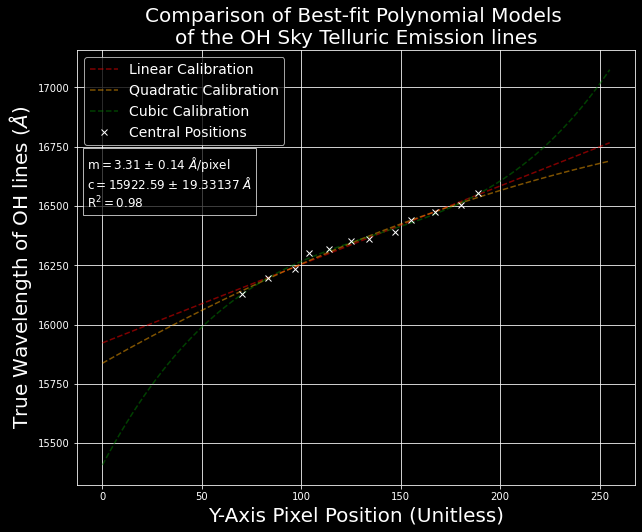

Figure 11. Graph establishing relationship between wavelength and y-axis pixel-position for measurements made in the OH sky telluric emission lines. The true values are m = 3.3101705777525257 and c = 15922.594170484777.
m: 3.3101705777525257 +/- 0.14269547200355698
c: 15922.594170484777 +/- 19.33137469274703


In [75]:
#Obtain best fit models with polyfit
polyfit_lin = np.polyfit(central_positions, OH_wavelengths, 1)
polyfit_quad = np.polyfit(central_positions, OH_wavelengths, 2)
polyfit_cube = np.polyfit(central_positions, OH_wavelengths, 3)

pixel_number = np.arange(256) #Pixel range was taken from DS9
#Now compute our best-fit models for all pixel values
lin_cal_polyfit =  polyfit_lin[0]*pixel_number + polyfit_lin[1]
quad_cal_polyfit =  polyfit_quad[0]*(pixel_number**2) + polyfit_quad[1]*pixel_number + polyfit_quad[2]
cube_cal_polyfit =  (polyfit_cube[0]*np.power(pixel_number,3) + 
                     polyfit_cube[1]*np.power(pixel_number,2) + 
                     polyfit_cube[2]*pixel_number + polyfit_cube[3])

#Plot all of the best-fit models
plt.figure(figsize = (10,8))
#Original OLS calibration
# plt.plot(pixel_number, lin_cal, '--', color = 'red',
#          alpha = 0.5, label = 'Linear Calibration')
# plt.plot(pixel_number, quad_cal, '--', color = 'orange',
#          alpha = 0.5, label = 'Quadratic Calibration')
# plt.plot(pixel_number, cube_cal, '--', color = 'green', 
#          alpha = 0.5, label = 'Cubic Calibration')
###with polyfit
plt.plot(pixel_number, lin_cal_polyfit, '--', color = 'red',
         alpha = 0.5, label = 'Linear Calibration')
plt.plot(pixel_number, quad_cal_polyfit, '--', color = 'orange',
         alpha = 0.5, label = 'Quadratic Calibration')
plt.plot(pixel_number, cube_cal_polyfit, '--', color = 'green', 
         alpha = 0.5, label = 'Cubic Calibration')

slope_intercept = np.polyfit(central_positions, OH_wavelengths,1)
m=slope_intercept[0]
c=slope_intercept[1]

#Calculating the r^2 value for linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(central_positions, OH_wavelengths)

text = '\n'.join((
    r'$\mathrm{m}=%.2f$' % (m, ) + ' ± 0.14 $\AA$/pixel',
    r'$\mathrm{c}=%.2f$' % (c, ) + ' ± 19.33137 $\AA$',
    r'$\mathrm{R^2}=%.2f$' % (r_value**2, )))
plt.text(-8,16490, text, fontdict=dict(fontsize=12), bbox=dict(facecolor='black', alpha=0.7, edgecolor='white'))

plt.plot(central_positions, OH_wavelengths, 'x', color = 'white', label='Central Positions')
plt.grid()
plt.xlabel("Y-Axis Pixel Position (Unitless)", size = 20)
plt.ylabel("True Wavelength of OH lines ($\AA$)", size = 20)
plt.title("Comparison of Best-fit Polynomial Models \nof the OH Sky Telluric Emission lines", size = 20)
#plt.legend(loc="best")
plt.legend(prop={'size': 14})
#plt.xlim(0, 1024)

caption="Figure 11. Graph establishing relationship between wavelength and y-axis pixel-position for measurements \
made in the OH sky telluric emission lines. The true values are m = "+str(m)+" and c = "+str(c)+"."

#plt.savefig('Lab2_fig11.png' + '.png', bbox_inches='tight', dpi=400)
plt.show()
print(caption)

#Error uncertainties
p, V  = np.polyfit(central_positions, OH_wavelengths, 1, cov=True)
print("m: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("c: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

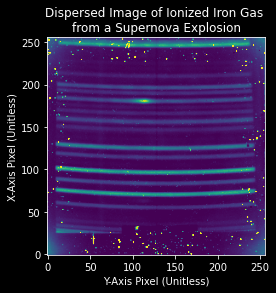

Figure 12. 2-dimensional dispersed image of ionized iron gas (Fe II) from a supernova explosion.


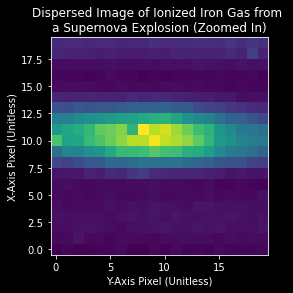

Figure 13. Zoomed In: 2-dimensional dispersed image of ionized iron gas (Fe II) from a supernova explosion.


In [76]:
#Opening the fits image to apply centroiding algorithm
hdul = fits.open('Near-Infrared.fits', ignore_missing_end = True)
img = hdul[0].data[0]
header = hdul[0].header
x,y = 115, 180
window = img[y-10:y+10,x-10:x+10]

plt.xlabel("Y-Axis Pixel (Unitless)")
plt.ylabel("X-Axis Pixel (Unitless)")
plt.title("Dispersed Image of Ionized Iron Gas \nfrom a Supernova Explosion")
caption="Figure 12. 2-dimensional dispersed image of ionized iron gas (Fe II) from a supernova explosion."
plt.imshow(img, origin='lower', vmin=400, vmax=16000)
#plt.savefig('Lab2_fig12.png' + '.png', bbox_inches='tight', dpi=400)
plt.show()
print(caption)

plt.xlabel("Y-Axis Pixel (Unitless)")
plt.ylabel("X-Axis Pixel (Unitless)")
plt.title("Dispersed Image of Ionized Iron Gas from \na Supernova Explosion (Zoomed In)")
caption="Figure 13. Zoomed In: 2-dimensional dispersed image of ionized iron gas (Fe II) from a supernova explosion."
plt.imshow(window, origin='lower', vmin=400, vmax=16000)
#plt.savefig('Lab2_fig13.png' + '.png', bbox_inches='tight', dpi=400)
plt.show()
print(caption)

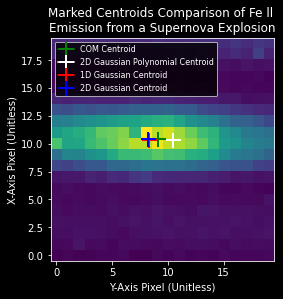

Figure 14. Marked Centroids of the zoomed in 2-dimensional dispersed image of ionized iron gas (Fe II) from a supernova explosion.

Mean of the sample is 10.389394712863034 
Standard Deviation of the sample is 0.03629690357082432 
Centroid Y-axis position = 180.38939471286304 ± 0.03629690357082432


In [77]:
#Using Centroiding algorithm to find the y-line of for the central position of the [Fe II] emission
data = window  # extract single object
xycen1 = centroid_com(data)
xycen2 = centroid_quadratic(data)
xycen3 = centroid_1dg(data)
xycen4 = centroid_2dg(data)
xycens = [xycen1, xycen2, xycen3, xycen4]
fig, ax = plt.subplots(1, 1, figsize=(4, 5))
ax.imshow(data, origin='lower', interpolation='nearest')
marker = '+'
ms, mew = 15, 2.
plt.plot(*xycen1, color='green', marker=marker, ms=ms, mew=mew, label='COM Centroid')
plt.plot(*xycen2, color='white', marker=marker, ms=ms, mew=mew, label='2D Gaussian Polynomial Centroid')
plt.plot(*xycen3, color='red', marker=marker, ms=ms, mew=mew, label='1D Gaussian Centroid')
plt.plot(*xycen4, color='blue', marker=marker, ms=ms, mew=mew, label='2D Gaussian Centroid')

plt.xlabel("Y-Axis Pixel (Unitless)")
plt.ylabel("X-Axis Pixel (Unitless)")
plt.title("Marked Centroids Comparison of Fe ll \nEmission from a Supernova Explosion")
plt.legend(loc=2, fontsize=8)
caption="Figure 14. Marked Centroids of the zoomed in 2-dimensional dispersed image of ionized iron gas (Fe II) from a supernova explosion."
#plt.savefig('Lab2_fig14.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.imshow(window, origin='lower', vmin=400, vmax=16000)
plt.show()
print(caption)

avg_y = (xycen1[1]+xycen2[1]+xycen3[1]+xycen4[1])/4
y_axis = avg_y+170 #since the image center was chosen as 180, then basline is 170

#Calculatin the error stdev for the centroid
d = [xycen1[1], xycen2[1], xycen3[1], xycen4[1]]
data = np.array(d)
def mean(data):
    n = len(data)
    mean = sum(data) / n
    return mean
def variance(data): 
    n = len(data)
    mean = sum(data) / n
    deviations = [(x - mean) ** 2 for x in data]
    variance = sum(deviations) / n
    return variance
def stdev(data):
    var = variance(data)
    std_dev = math.sqrt(var)
    return std_dev
 
print("\nMean of the sample is % s " % (mean(data))) 
print("Standard Deviation of the sample is % s "% (stdev(data)))
print('Centroid Y-axis position =', y_axis, "±", stdev(data))

In [78]:
#observed wavelength of the [Fe II] emission line:
lambda_Fe = m*y+c
#from uncertainty calculator:
lambda_Fe = 16519.7138374019 
lambda_Fe_err = 32.1916555139583
print('Observed wavelength of the [Fe II] emission line: λ =', lambda_Fe, 'Å ±', lambda_Fe_err, 'Å.')
print('Observed wavelength of the [Fe II] emission line: λ =', '1.651971383740190369', 'µm ±', '0.003219165551395830431', 'µm.\n')

#we can use the doppler equation to get the velocity of the gas v = (l-l_0 -1)c
v_s = ((1.651971383740190369/1.6439981)-1)*constant.speed_of_light
#from uncertainty calculator
v_s = 1453973.90106658
v_s_err = 587033.253482398
print('Velocity of the gas emitting the [Fe II] emission: v_s =', v_s, 'm/s ±', v_s_err, 'm/s.')
print('Velocity of the gas emitting the [Fe II] emission: v_s =', v_s/constant.speed_of_light, 'c ±', v_s_err/constant.speed_of_light, 'c.')

Observed wavelength of the [Fe II] emission line: λ = 16519.7138374019 Å ± 32.1916555139583 Å.
Observed wavelength of the [Fe II] emission line: λ = 1.651971383740190369 µm ± 0.003219165551395830431 µm.

Velocity of the gas emitting the [Fe II] emission: v_s = 1453973.90106658 m/s ± 587033.253482398 m/s.
Velocity of the gas emitting the [Fe II] emission: v_s = 0.004849934887510013 c ± 0.0019581321604908355 c.


**3. Nighttime Observing with the Campus Telescope**

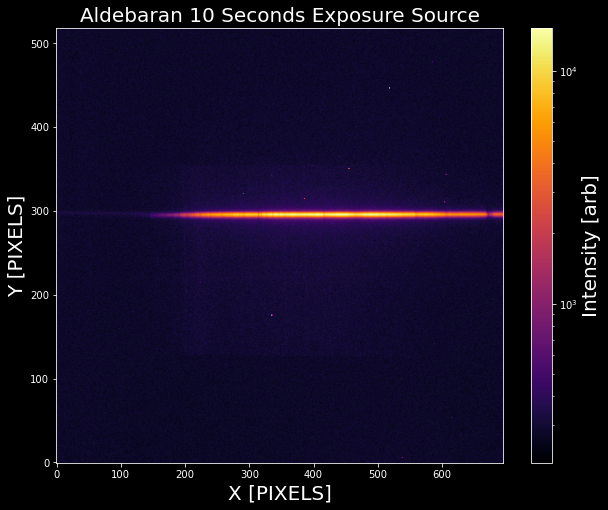

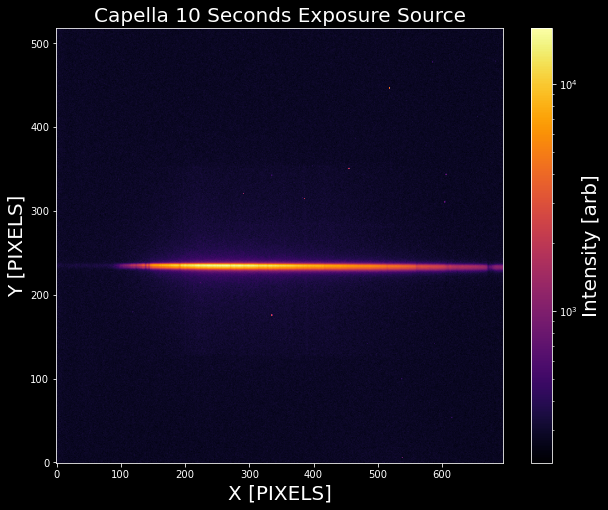

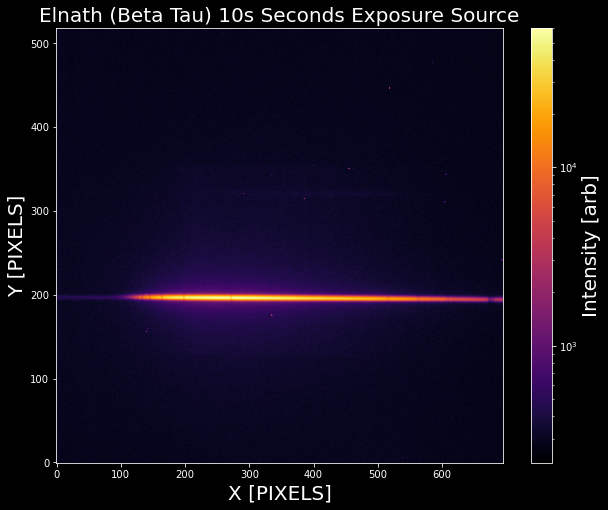

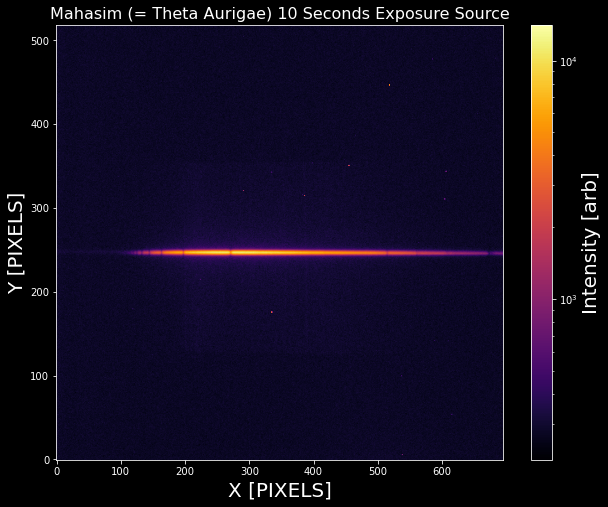

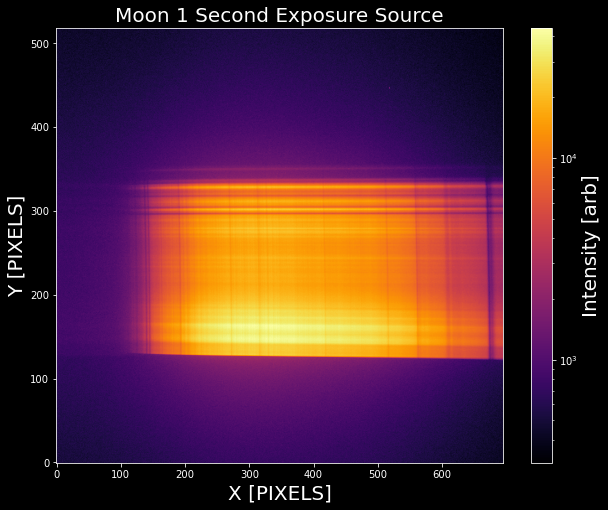

In [79]:
#Target: Aldebaran K5 III, Capella G3(?) III, Elnath (Beta Tau) B7 III, Mahasim (= Theta Aurigae) A0 V (variable), Moon

#The file name
fits_image_filename = 'Aldebaran-10s.fit'
#fits_image_filename = 'moon_int60s.fit'
#Opening the fits file and extracting the image as a numpy array
Aldebaran = fits.open(fits_image_filename)[0].data
#Now let's plot it up to see what we are working with
plt.figure(figsize=(10,8))
plt.imshow(Aldebaran, 
           cmap = 'inferno', 
           aspect='auto', 
           norm = LogNorm(vmin=np.min(Aldebaran), 
                          vmax=np.max(Aldebaran)),
           origin = 'lower')
plt.xlabel("X [PIXELS]", size = 20)
plt.ylabel("Y [PIXELS]", size = 20)
plt.title("Aldebaran 10 Seconds Exposure Source", size = 20)
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]', size=20)
#plt.savefig('Lab2_fig15.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
#The file name
fits_image_filename = 'Capella-10s.fit'
#fits_image_filename = 'moon_int60s.fit'
#Opening the fits file and extracting the image as a numpy array
Capella = fits.open(fits_image_filename)[0].data
#Now let's plot it up to see what we are working with
plt.figure(figsize=(10,8))
plt.imshow(Capella, 
           cmap = 'inferno', 
           aspect='auto', 
           norm = LogNorm(vmin=np.min(Capella), 
                          vmax=np.max(Capella)),
           origin = 'lower')
plt.xlabel("X [PIXELS]", size = 20)
plt.ylabel("Y [PIXELS]", size = 20)
plt.title("Capella 10 Seconds Exposure Source", size = 20)
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]', size=20)
#plt.savefig('Lab2_fig16.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
#The file name
fits_image_filename = 'Elnath-betaTau-10s.fit'
#fits_image_filename = 'moon_int60s.fit'
#Opening the fits file and extracting the image as a numpy array
Elnath = fits.open(fits_image_filename)[0].data
#Now let's plot it up to see what we are working with
plt.figure(figsize=(10,8))
plt.imshow(Elnath, 
           cmap = 'inferno', 
           aspect='auto', 
           norm = LogNorm(vmin=np.min(Elnath), 
                          vmax=np.max(Elnath)),
           origin = 'lower')
plt.xlabel("X [PIXELS]", size = 20)
plt.ylabel("Y [PIXELS]", size = 20)
plt.title("Elnath (Beta Tau) 10s Seconds Exposure Source", size = 20)
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]', size=20)
#plt.savefig('Lab2_fig17.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
#The file name
fits_image_filename = 'Mahasim-THeta-Aur-10s.fit'
#fits_image_filename = 'moon_int60s.fit'
#Opening the fits file and extracting the image as a numpy array
Mahasim = fits.open(fits_image_filename)[0].data
#Now let's plot it up to see what we are working with
plt.figure(figsize=(10,8))
plt.imshow(Mahasim, 
           cmap = 'inferno', 
           aspect='auto', 
           norm = LogNorm(vmin=np.min(Mahasim), 
                          vmax=np.max(Mahasim)),
           origin = 'lower')
plt.xlabel("X [PIXELS]", size = 20)
plt.ylabel("Y [PIXELS]", size = 20)
plt.title("Mahasim (= Theta Aurigae) 10 Seconds Exposure Source", size = 16)
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]', size=20)
#plt.savefig('Lab2_fig18.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
#The file name
fits_image_filename = 'Moon-1s.fit'
#fits_image_filename = 'moon_int60s.fit'
#Opening the fits file and extracting the image as a numpy array
Moon = fits.open(fits_image_filename)[0].data
#Now let's plot it up to see what we are working with
plt.figure(figsize=(10,8))
plt.imshow(Moon, 
           cmap = 'inferno', 
           aspect='auto', 
           norm = LogNorm(vmin=np.min(Moon), 
                          vmax=np.max(Moon)),
           origin = 'lower')
plt.xlabel("X [PIXELS]", size = 20)
plt.ylabel("Y [PIXELS]", size = 20)
plt.title("Moon 1 Second Exposure Source", size = 20)
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]', size=20)
#plt.savefig('Lab2_fig19.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()

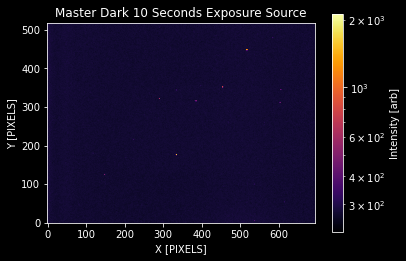

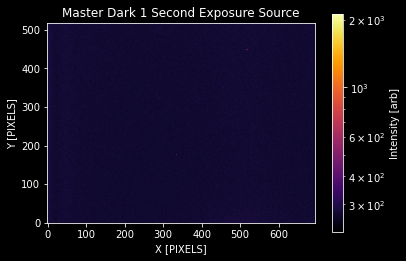

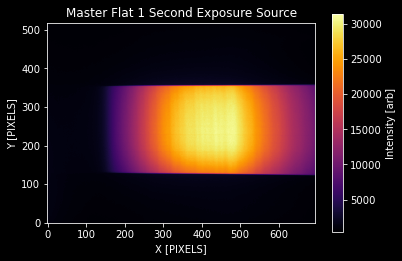

In [80]:
#Creating master dark for 10s exposure
dark_files_name = ['Dark-0001_10s.fit', 'Dark-0002_10s.fit', 'Dark-0003_10s.fit']
darks_10s = np.zeros((3,519,695))
for i in range(len(dark_files_name)):
    darks_10s[i] = fits.open(dark_files_name[i])[0].data
master_dark10s = np.median(darks_10s, axis=0)

#Creating master dark for 1s exposure
dark_files_name = ['Dark-0001_1s.fit', 'Dark-0002_1s.fit', 'Dark-0003_1s.fit']
darks_1s = np.zeros((3,519,695))
for i in range(len(dark_files_name)):
    darks_1s[i] = fits.open(dark_files_name[i])[0].data
master_dark1s = np.median(darks_1s, axis=0)

#Creating master flat for 1s exposure
flat_files_name = ['Flat-1s_01.fit', 'Flat-1s_02.fit', 'Flat-1s_03.fit']
flats_1s = np.zeros((3,519,695))
for i in range(len(flat_files_name)):
    flats_1s[i] = fits.open(flat_files_name[i])[0].data
master_flat1s = np.median(flats_1s, axis=0)

plt.imshow(master_dark10s, origin='lower', norm=LogNorm(vmin=master_dark1s.min(), vmax=master_dark1s.max()), cmap='inferno')
plt.xlabel("X [PIXELS]")
plt.ylabel("Y [PIXELS]")
plt.title("Master Dark 10 Seconds Exposure Source")
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]')
#plt.savefig('Lab2_fig20.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()

plt.imshow(master_dark1s, origin='lower', norm=LogNorm(vmin=master_dark1s.min(), vmax=master_dark1s.max()), cmap='inferno')
plt.xlabel("X [PIXELS]")
plt.ylabel("Y [PIXELS]")
plt.title("Master Dark 1 Second Exposure Source")
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]')
#plt.savefig('Lab2_fig21.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()

plt.imshow(master_flat1s, origin='lower', cmap='inferno')
plt.xlabel("X [PIXELS]")
plt.ylabel("Y [PIXELS]")
plt.title("Master Flat 1 Second Exposure Source")
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]')
#plt.savefig('Lab2_fig22.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()

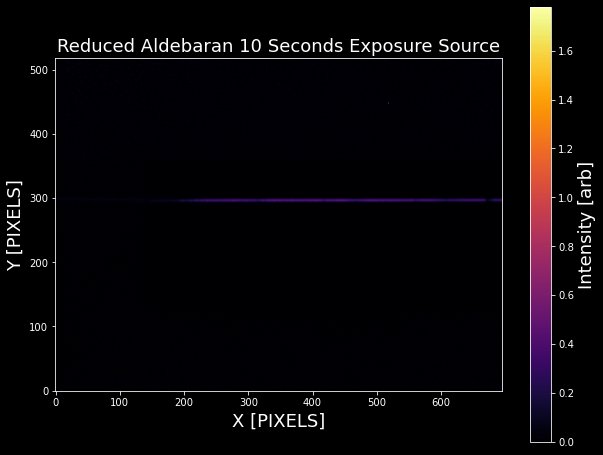

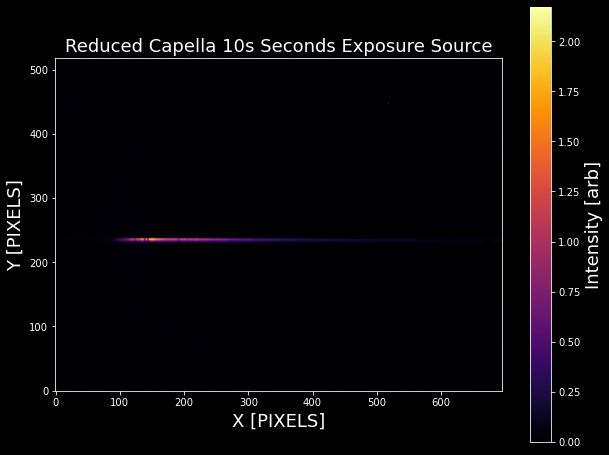

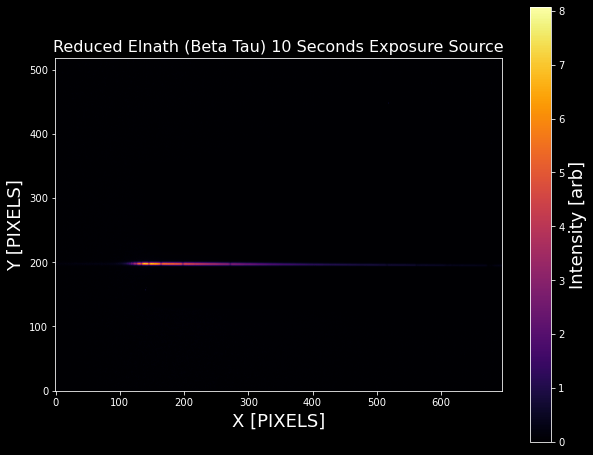

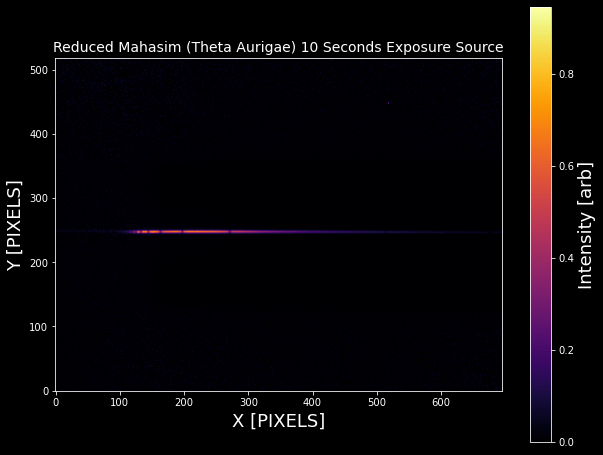

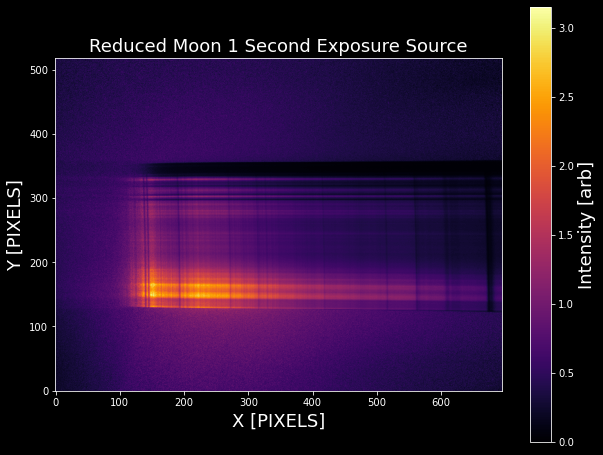

In [66]:
Aldebaran = fits.open('Aldebaran-10s.fit')[0].data.astype('float')
Capella = fits.open('Capella-10s.fit')[0].data.astype('float')
Elnath = fits.open('Elnath-betaTau-10s.fit')[0].data.astype('float')
Mahasim = fits.open('Mahasim-THeta-Aur-10s.fit')[0].data.astype('float')
Moon = fits.open('Moon-1s.fit')[0].data.astype('float')

Aldebaran_r = Aldebaran.copy()
Capella_r = Capella.copy()
Elnath_r = Elnath.copy()
Mahasim_r = Mahasim.copy()
Moon_r = Moon.copy()

#creating list of objects
objects2 = [Aldebaran_r, Capella_r, Elnath_r, Mahasim_r]

#A: Subtract the master 10-s Dark from objects

#B: Subtract the master 1-sec Dark from the master 1-sec Flat
DF_master = master_flat1s - master_dark1s

#C: Divide the product of (A) by that of (B). This will provide a flat-fielded image with Dark (and Bias) already having been subtracted.

#Operation for A and C
for i in range(len(objects2)):
    objects2[i] -= master_dark10s
    objects2[i] /= DF_master
Moon_r -= master_dark1s
Moon_r /= DF_master

#Now let's plot it up to see what we are working with
plt.figure(figsize=(10,8))
plt.imshow(Aldebaran_r,
           cmap = 'inferno',
           origin = 'lower', vmin=0)
plt.xlabel("X [PIXELS]", size=18)
plt.ylabel("Y [PIXELS]", size=18)
plt.title("Reduced Aldebaran 10 Seconds Exposure Source", size=18)
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]', size=18)
#plt.savefig('Lab2_fig23.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
#Now let's plot it up to see what we are working with
plt.figure(figsize=(10,8))
plt.imshow(Capella_r, 
           cmap = 'inferno', 
           origin = 'lower', vmin=0)
plt.xlabel("X [PIXELS]", size=18)
plt.ylabel("Y [PIXELS]", size=18)
plt.title("Reduced Capella 10s Seconds Exposure Source", size=18)
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]', size=18)
#plt.savefig('Lab2_fig24.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
#Now let's plot it up to see what we are working with
plt.figure(figsize=(10,8))
plt.imshow(Elnath_r, 
           cmap = 'inferno', 
           origin = 'lower', vmin=0)
plt.xlabel("X [PIXELS]", size=18)
plt.ylabel("Y [PIXELS]", size=18)
plt.title("Reduced Elnath (Beta Tau) 10 Seconds Exposure Source", size=16)
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]', size=18)
#plt.savefig('Lab2_fig25.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
#Now let's plot it up to see what we are working with
plt.figure(figsize=(10,8))
plt.imshow(Mahasim_r, 
           cmap = 'inferno', 
           origin = 'lower', vmin=0)
plt.xlabel("X [PIXELS]", size=18)
plt.ylabel("Y [PIXELS]", size=18)
plt.title("Reduced Mahasim (Theta Aurigae) 10 Seconds Exposure Source", size=14)
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]', size=18)
#plt.savefig('Lab2_fig26.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
#Now let's plot it up to see what we are working with
plt.figure(figsize=(10,8))
plt.imshow(Moon_r, 
           cmap = 'inferno', 
           origin = 'lower', vmin=0)
plt.xlabel("X [PIXELS]", size=18)
plt.ylabel("Y [PIXELS]", size=18)
plt.title("Reduced Moon 1 Second Exposure Source", size=18)
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]', size=18)
#plt.savefig('Lab2_fig27.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()

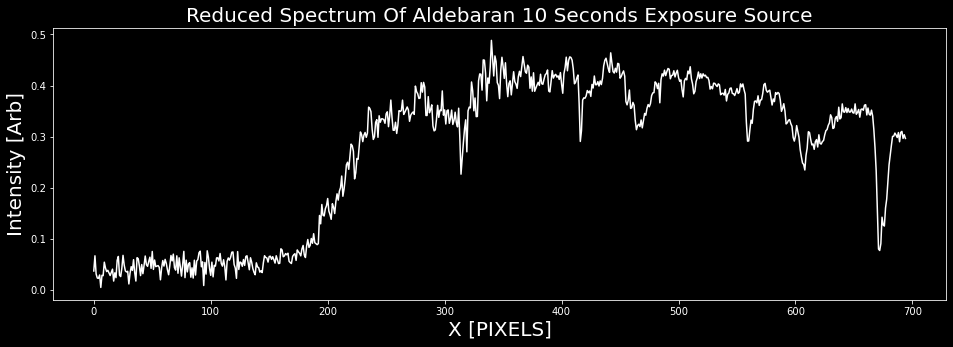

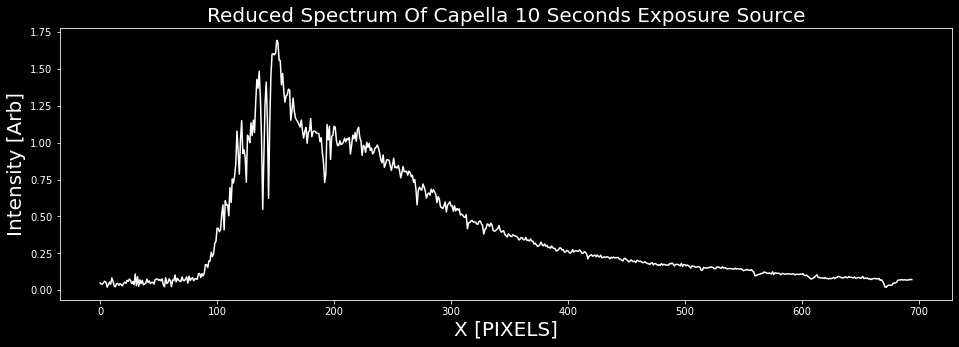

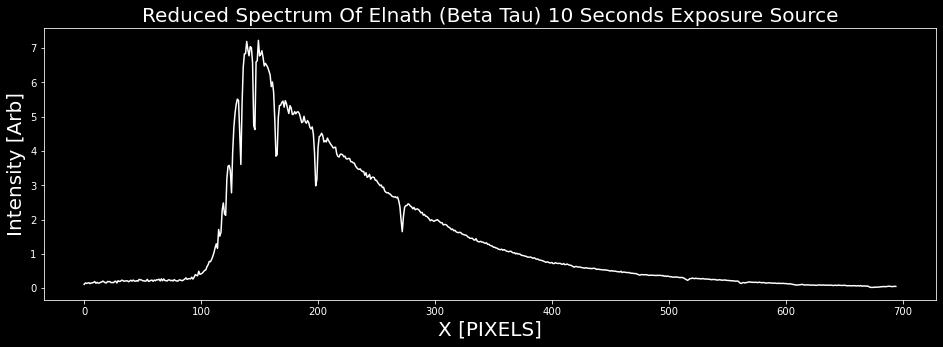

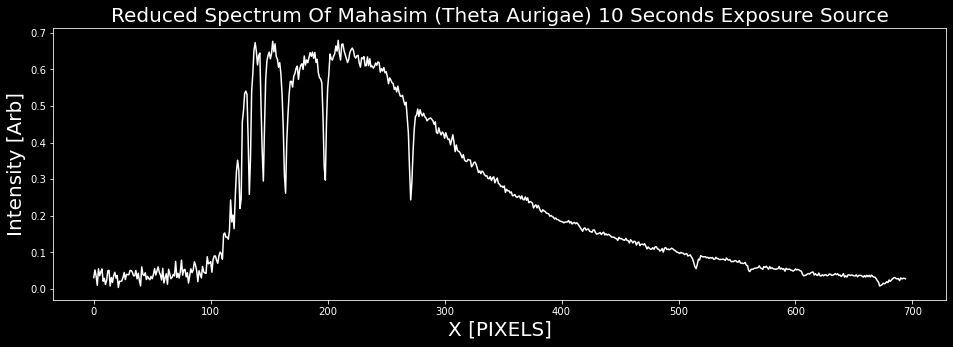

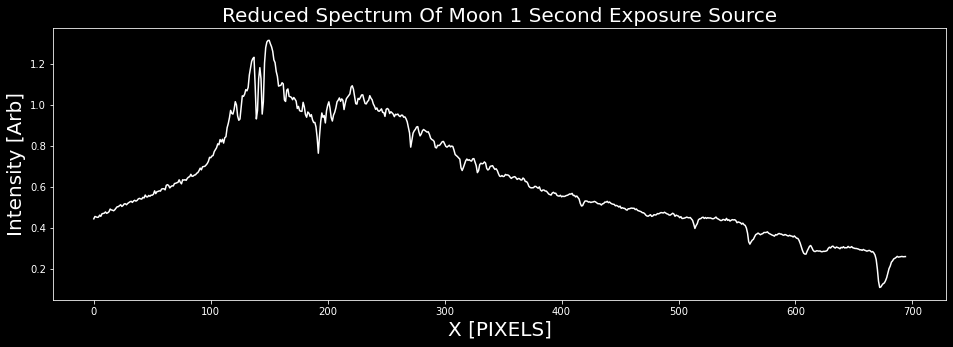

In [107]:
#Plotting reduced spectrums of the objects, by estimating line from Ds9

Aldebran_spectrum = np.median(Aldebaran_r[297-1:297+1], axis=0)
plt.figure(figsize=[16, 5])
plt.plot(Aldebran_spectrum, color='white')
plt.xlabel("X [PIXELS]", size=20)
plt.ylabel("Intensity [Arb]", size=20)
plt.title("Reduced Spectrum Of Aldebaran 10 Seconds Exposure Source", size=20)
#plt.savefig('Lab2_fig28.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
Capella_spectrum = np.median(Capella_r[235-1:235+1], axis=0)
plt.figure(figsize=[16, 5])
plt.plot(Capella_spectrum, color='white')
plt.xlabel("X [PIXELS]", size=20)
plt.ylabel("Intensity [Arb]", size=20)
plt.title("Reduced Spectrum Of Capella 10 Seconds Exposure Source", size=20)
#plt.savefig('Lab2_fig29.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
Elnath_spectrum = np.median(Elnath_r[198-1:198+1], axis=0)
plt.figure(figsize=[16, 5])
plt.plot(Elnath_spectrum, color='white')
plt.xlabel("X [PIXELS]", size=20)
plt.ylabel("Intensity [Arb]", size=20)
plt.title("Reduced Spectrum Of Elnath (Beta Tau) 10 Seconds Exposure Source", size=20)
#plt.savefig('Lab2_fig30.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
Mahasim_spectrum = np.median(Mahasim_r[248-1:248+1], axis=0)
plt.figure(figsize=[16, 5])
plt.plot(Mahasim_spectrum, color='white')
plt.xlabel("X [PIXELS]", size=20)
plt.ylabel("Intensity [Arb]", size=20)
plt.title("Reduced Spectrum Of Mahasim (Theta Aurigae) 10 Seconds Exposure Source", size=20)
#plt.savefig('Lab2_fig31.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
Moon_spectrum = np.median(Moon_r[128:333], axis=0)
plt.figure(figsize=[16, 5])
plt.plot(Moon_spectrum, color='white')
plt.xlabel("X [PIXELS]", size=20)
plt.ylabel("Intensity [Arb]", size=20)
plt.title("Reduced Spectrum Of Moon 1 Second Exposure Source", size=20)
#plt.savefig('Lab2_fig32.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()

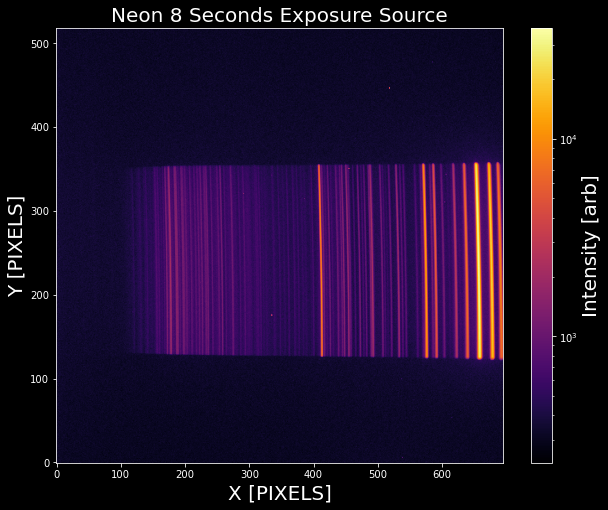

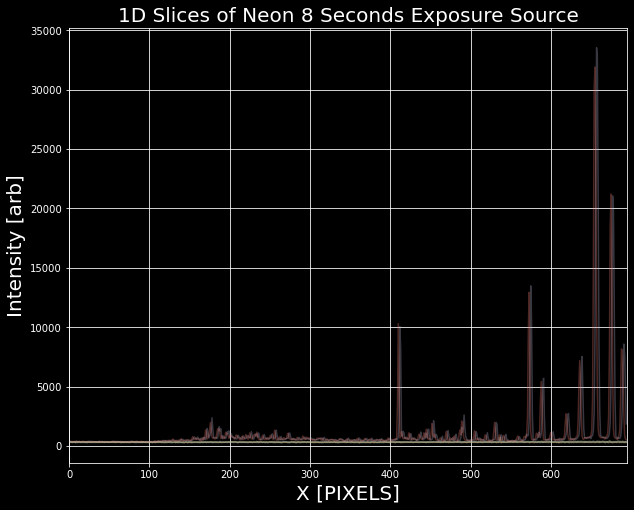

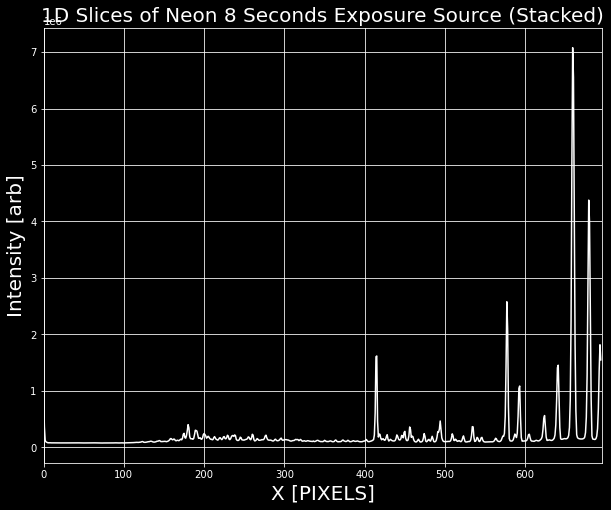

In [96]:
#Wavelength calibration using Neon-8s.fit file
#The file name
fits_image_filename = 'Neon-8s.fit'
#fits_image_filename = 'moon_int60s.fit'
#Opening the fits file and extracting the image as a numpy array
neon = fits.open(fits_image_filename)[0].data
#Now let's plot it up to see what we are working with
plt.figure(figsize=(10,8))
plt.imshow(neon, 
           cmap = 'inferno', 
           aspect='auto', 
           norm = LogNorm(vmin=np.min(neon), 
                          vmax=np.max(neon)),
           origin = 'lower')
plt.xlabel("X [PIXELS]", size = 20)
plt.ylabel("Y [PIXELS]", size = 20)
plt.title("Neon 8 Seconds Exposure Source", size = 20)
cb = plt.colorbar()
cb.set_label(label='Intensity [arb]', size=20)
#plt.savefig('Lab2_fig33.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()

#We can also plot every 5 rows or so on top of each other like this
plt.figure(figsize=(10,8))
for i in np.arange(neon.shape[0])[::100]:
    plt.plot(neon[i, :], alpha = 0.3)
plt.xlabel("X [PIXELS]", size = 20)
plt.ylabel("Intensity [arb]", size = 20)
plt.title("1D Slices of Neon 8 Seconds Exposure Source", size = 20)
plt.grid()
plt.xlim(0, neon.shape[1])
#plt.savefig('Lab2_fig34.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()

"""
We can even stack all of the rows on top of each other to get 
a better idea of the overall spectrum

Lets start by computing the slope. Since the max pixel is usually 
from the dominant emission line, lets try using the max value of
the first and last rows as our reference.

Then we can shift each row using the numpy.roll function (see the docs)
to roughly line all of the rows up (to pixel precision) and stack them.
"""
ntrim = neon[125:350,:]
starting_max = np.where(ntrim[0, :] == np.max(ntrim[0, :]))[0]
ending_max = np.where(ntrim[-1, :] == np.max(ntrim[-1, :]))[0]
slope = ((ending_max - starting_max)/ntrim.shape[0])[0]
stack_neon = np.zeros(ntrim.shape[1])
for i in range(ntrim.shape[0]):
    stack_neon += np.roll(ntrim[i, :], round(-1*slope*i))
    

plt.figure(figsize=(10,8))
plt.plot(stack_neon, color = 'white', alpha = 1)
plt.xlabel("X [PIXELS]", size = 20)
plt.ylabel("Intensity [arb]", size = 20)
plt.title("1D Slices of Neon 8 Seconds Exposure Source (Stacked)", size = 20)
plt.grid()
plt.xlim(0, ntrim.shape[1])
#plt.savefig('Lab2_fig35.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()

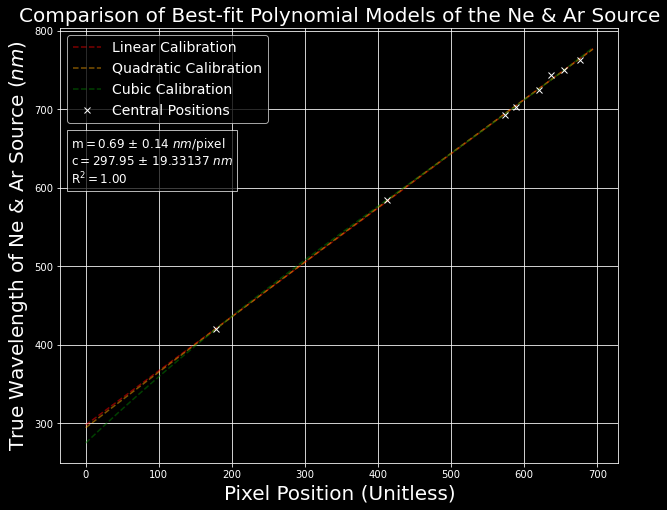

Figure 11. Graph establishing relationship between wavelength and y-axis pixel-position for measurements made in the Neon and Argon Source emission lines. The true values are m = 0.691127480428978 and c = 297.9530759322257.
m: 0.691127480428978 +/- 0.0066293640392997835
c: 297.9530759322257 +/- 3.7457336801370658


In [98]:
#Wavelength calibration
NeonArgonSource_wavelengths = [420.067, 585.249, 692.947, 703.241, 724.517, 743.89, 750.387, 763.511] #Units are nm (Ne and Ar)
NeonArgonSource_wavelengths = np.array(NeonArgonSource_wavelengths)
cent_positions = [178, 412, 574, 589, 620, 637, 655, 676] #in terms of y-axis pixel numbers, of the identified lines
cent_positions = np.array(cent_positions)

#Obtain best fit models with polyfit
polyfit_lin = np.polyfit(cent_positions, NeonArgonSource_wavelengths, 1)
polyfit_quad = np.polyfit(cent_positions, NeonArgonSource_wavelengths, 2)
polyfit_cube = np.polyfit(cent_positions, NeonArgonSource_wavelengths, 3)

pixel_number = np.arange(695) #Pixel range was taken from DS9
#Now compute our best-fit models for all pixel values
lin_cal_polyfit =  polyfit_lin[0]*pixel_number + polyfit_lin[1]
quad_cal_polyfit =  polyfit_quad[0]*(pixel_number**2) + polyfit_quad[1]*pixel_number + polyfit_quad[2]
cube_cal_polyfit =  (polyfit_cube[0]*np.power(pixel_number,3) + 
                     polyfit_cube[1]*np.power(pixel_number,2) + 
                     polyfit_cube[2]*pixel_number + polyfit_cube[3])

#Plot all of the best-fit models
plt.figure(figsize = (10,8))
#Original OLS calibration
# plt.plot(pixel_number, lin_cal, '--', color = 'red',
#          alpha = 0.5, label = 'Linear Calibration')
# plt.plot(pixel_number, quad_cal, '--', color = 'orange',
#          alpha = 0.5, label = 'Quadratic Calibration')
# plt.plot(pixel_number, cube_cal, '--', color = 'green', 
#          alpha = 0.5, label = 'Cubic Calibration')
###with polyfit
plt.plot(pixel_number, lin_cal_polyfit, '--', color = 'red',
         alpha = 0.5, label = 'Linear Calibration')
plt.plot(pixel_number, quad_cal_polyfit, '--', color = 'orange',
         alpha = 0.5, label = 'Quadratic Calibration')
plt.plot(pixel_number, cube_cal_polyfit, '--', color = 'green', 
         alpha = 0.5, label = 'Cubic Calibration')

slope_intercept = np.polyfit(cent_positions, NeonArgonSource_wavelengths,1)
m=slope_intercept[0]
c=slope_intercept[1]

#Calculating the r^2 value for linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(cent_positions, NeonArgonSource_wavelengths)

text = '\n'.join((
    r'$\mathrm{m}=%.2f$' % (m, ) + ' ± 0.14 $nm$/pixel',
    r'$\mathrm{c}=%.2f$' % (c, ) + ' ± 19.33137 $nm$',
    r'$\mathrm{R^2}=%.2f$' % (r_value**2, )))
plt.text(-20,605, text, fontdict=dict(fontsize=12), bbox=dict(facecolor='black', alpha=0.7, edgecolor='white'))

plt.plot(cent_positions, NeonArgonSource_wavelengths, 'x', color = 'white', label='Central Positions')
plt.grid()
plt.xlabel("Pixel Position (Unitless)", size = 20)
plt.ylabel("True Wavelength of Ne & Ar Source ($nm$)", size = 20)
plt.title("Comparison of Best-fit Polynomial Models of the Ne & Ar Source", size = 20)
#plt.legend(loc="best")
plt.legend(prop={'size': 14})
#plt.xlim(0, 1024)

caption="Figure 11. Graph establishing relationship between wavelength and y-axis pixel-position for measurements \
made in the Neon and Argon Source emission lines. The true values are m = "+str(m)+" and c = "+str(c)+"."

#plt.savefig('Lab2_fig36.png' + '.png', bbox_inches='tight', dpi=400)
plt.show()
print(caption)

#Error uncertaintiesz
p, V  = np.polyfit(cent_positions, NeonArgonSource_wavelengths, 1, cov=True)
print("m: {} +/- {}".format(p[0], np.sqrt(V[0][0])))
print("c: {} +/- {}".format(p[1], np.sqrt(V[1][1])))

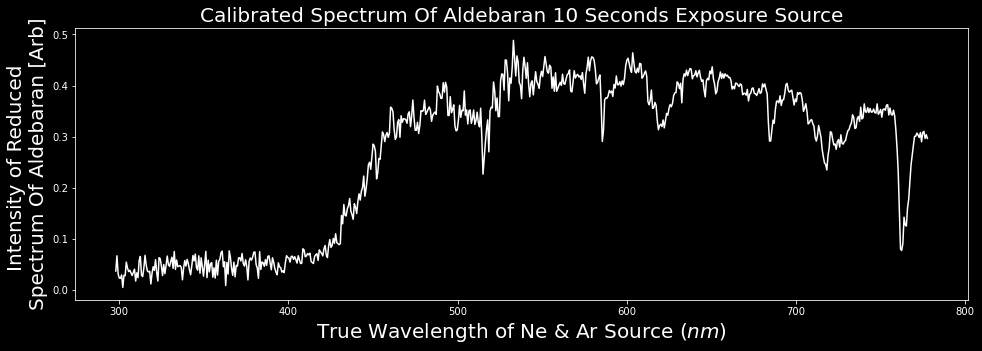

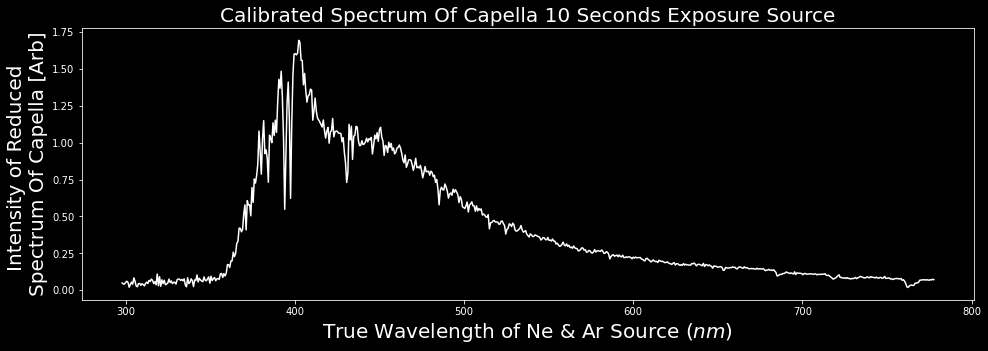

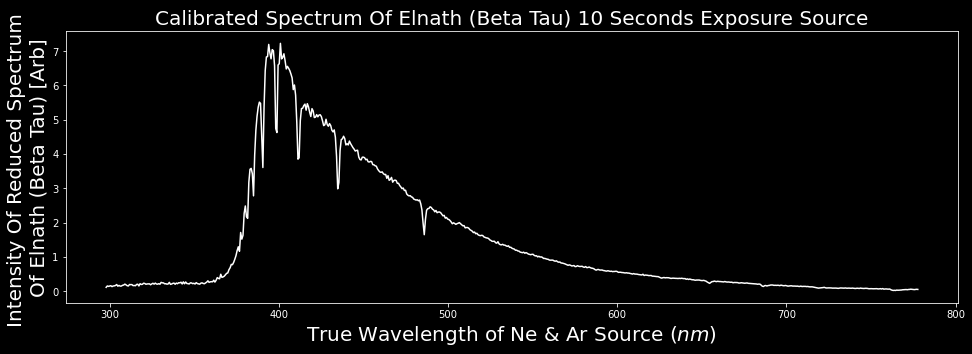

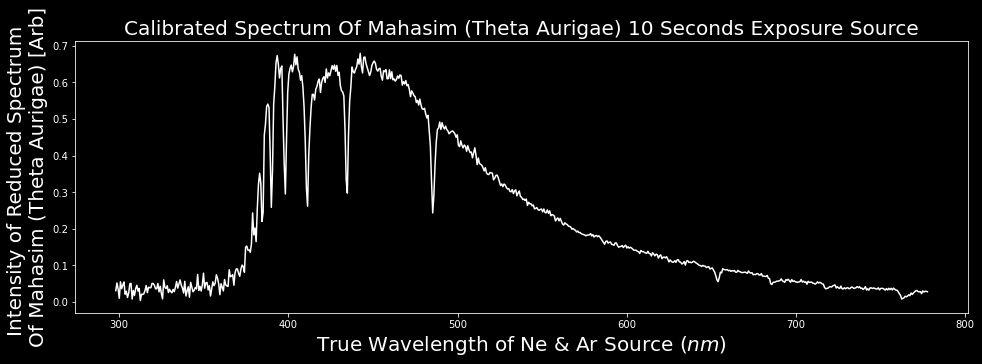

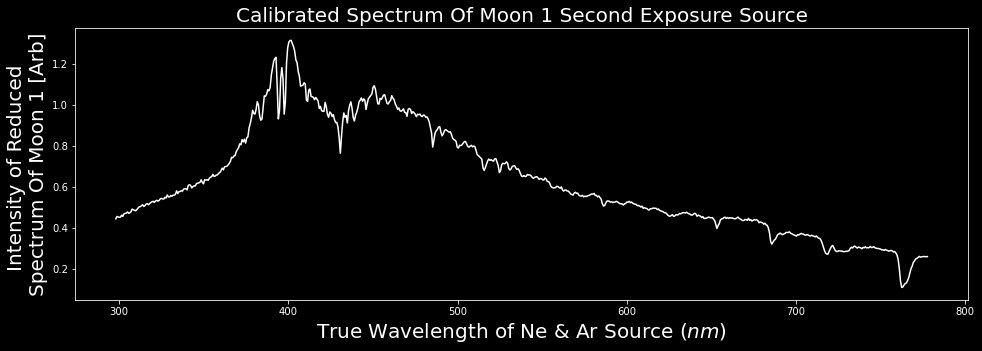

In [121]:
#E: Conduct the wavelength calibration 
pixel_r = np.arange(695)
NeArWavelengths = [m*i+c for i in pixel_r]

#Applying wavelengths to soln for final spectrum of objs
plt.figure(figsize=[16, 5])
plt.plot(NeArWavelengths, Aldebran_spectrum, color='white')
plt.xlabel("True Wavelength of Ne & Ar Source ($nm$)", size=20)
plt.ylabel("Intensity of Reduced \nSpectrum Of Aldebaran [Arb]",size=20)
plt.title("Calibrated Spectrum Of Aldebaran 10 Seconds Exposure Source", size=20)
#plt.savefig('Lab2_fig37.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
plt.figure(figsize=[16, 5])
plt.plot(NeArWavelengths, Capella_spectrum, color='white')
plt.xlabel("True Wavelength of Ne & Ar Source ($nm$)", size=20)
plt.ylabel("Intensity of Reduced \nSpectrum Of Capella [Arb]", size=20)
plt.title("Calibrated Spectrum Of Capella 10 Seconds Exposure Source", size=20)
#plt.savefig('Lab2_fig38.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
plt.figure(figsize=[16, 5])
plt.plot(NeArWavelengths, Elnath_spectrum, color='white')
plt.xlabel("True Wavelength of Ne & Ar Source ($nm$)", size=20)
plt.ylabel("Intensity Of Reduced Spectrum \nOf Elnath (Beta Tau) [Arb]", size=20)
plt.title("Calibrated Spectrum Of Elnath (Beta Tau) 10 Seconds Exposure Source", size=20)
#plt.savefig('Lab2_fig39.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
plt.figure(figsize=[16, 5])
plt.plot(NeArWavelengths, Mahasim_spectrum, color='white')
plt.xlabel("True Wavelength of Ne & Ar Source ($nm$)", size=20)
plt.ylabel("Intensity of Reduced Spectrum \nOf Mahasim (Theta Aurigae) [Arb]", size=20)
plt.title("Calibrated Spectrum Of Mahasim (Theta Aurigae) 10 Seconds Exposure Source", size=20)
#plt.savefig('Lab2_fig40.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()
#----------------------------------------------------------------------------------------
plt.figure(figsize=[16, 5])
plt.plot(NeArWavelengths, Moon_spectrum, color='white')
plt.xlabel("True Wavelength of Ne & Ar Source ($nm$)", size=20)
plt.ylabel("Intensity of Reduced \nSpectrum Of Moon 1 [Arb]", size=20)
plt.title("Calibrated Spectrum Of Moon 1 Second Exposure Source", size=20)
#plt.savefig('Lab2_fig41.png' + '.png', bbox_inches='tight', dpi=400, transparent=False)
plt.show()